In [1]:
pip install replicate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for replicate: filename=replicate-0.8.1-py3-none-any.whl size=21099 sha256=c6a1afea83ae021616b601be7ec0b60831a43f9e809863fd6e1cbeced4175d9b
  Stored in directory: /root/.cache/pip/wheels/7f/de/2f/7f55f2dcb401baa19b90823c42391b55b09a372f5751356b02
Successfully built replicate


In [2]:
import replicate
import requests
from PIL import Image
from io import BytesIO

In [3]:
def getCameraImage():
  client = replicate.Client(api_token='<api_token>')
  output = client.run(
      "stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf",
      input={"prompt": "people walking, in the shopping center, from upper angel"}
  )
  return output[0]

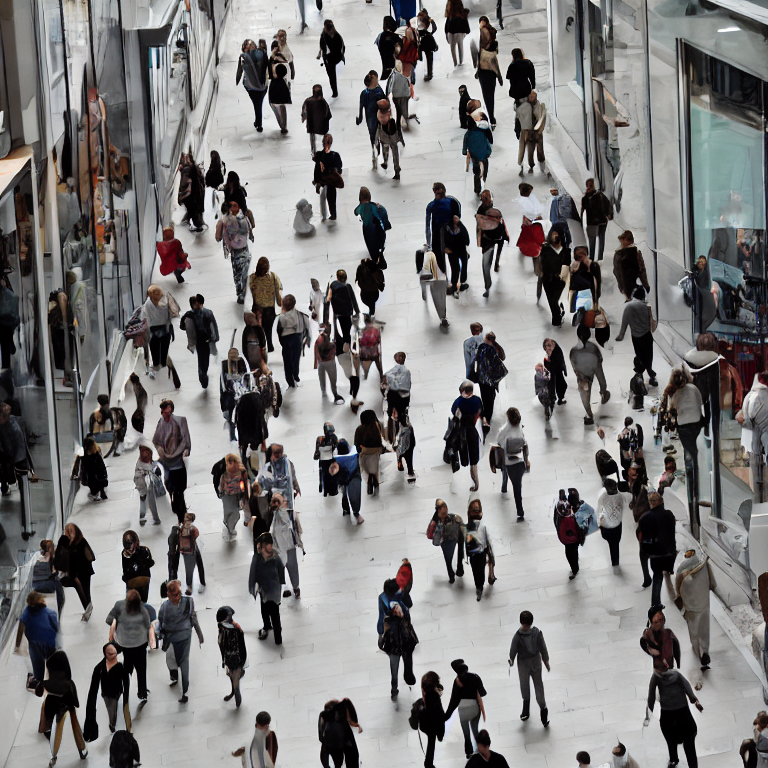

In [4]:
url = getCameraImage()
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [10]:
import numpy as np
import tensorflow as tf
import os

IMAGE_SIZE = 299
LEARNING_RATE = 1e-3
model = None

def load_images(img):
  img = Image.open(BytesIO(img.content))
  img = img.resize(size=(IMAGE_SIZE, IMAGE_SIZE))
  img = np.array(img, dtype=np.uint8)
  img = np.expand_dims(img, axis=0)

  return img

def create_model() -> tf.keras.Model:
  feature_model = tf.keras.applications.InceptionResNetV2(
  include_top=False, pooling='avg')
  feature_model.trainable = False

  model = tf.keras.Sequential([
      tf.keras.Input((IMAGE_SIZE, IMAGE_SIZE, 3)),
      feature_model,
      tf.keras.layers.Dense(512, activation='selu'),
      tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  return model

def getModel():
  checkpoint_path = "drive/MyDrive/TIES4911/mini-project/training-2/cp-{epoch:04d}.ckpt"
  checkpoint_dir = os.path.dirname(checkpoint_path)
  latest = tf.train.latest_checkpoint(checkpoint_dir)

  model = create_model()

  if latest:
    model.load_weights(latest)
  
  return model

def countingCrowd(img):
  global model
  img = load_images(img)
  if model is None:
    model = getModel()
  result = model.predict(img)
  return result

In [11]:
import time
import datetime
import threading

class myThread (threading.Thread):
   def __init__(self):
      threading.Thread.__init__(self)
   def run(self):
      print("Getting camera image")
      url = getCameraImage()
      print('Img: ', url)
      urlResponse = requests.get(url)
      count = countingCrowd(urlResponse)
      print('Count: ', count[0][0])
      updatePeopleCount(count[0][0])

def updatePeopleCount(count):
  # TODO: send counting of people to server through some API
  return

def countdown(h, m, s):
  global threads
  total_seconds = h * 3600 + m * 60 + s
  delay = 0

  while total_seconds > 0: 
      timer = datetime.timedelta(seconds = total_seconds)
      print('Timer: ', timer)

      if delay % 60 == 0:
        thread = myThread()
        thread.start()
        threads.append(thread)

      # Delays the program one second
      time.sleep(1)

      # Reduces total time by one second
      total_seconds -= 1
      delay += 1

threads = []
# Inputs for hours, minutes, seconds on timer
h = 0
m = 1
s = 30
countdown(int(h), int(m), int(s))

#for t in threads:
#    t.join()

print("Program stops!")

Timer:  0:01:30
Getting camera image
Timer:  0:01:29
Timer:  0:01:28
Timer:  0:01:27
Timer:  0:01:26
Img:  https://replicate.delivery/pbxt/C5IMvBgVbOLHE9nHuXw1kWnSMb4XtqhkecCfwGMIliyNOQ9QA/out-0.png
Timer:  0:01:25
Timer:  0:01:24
Timer:  0:01:23
Timer:  0:01:22
Timer:  0:01:21
Timer:  0:01:20
Timer:  0:01:19
Timer:  0:01:18
Timer:  0:01:17
Timer:  0:01:16
Timer:  0:01:15
Timer:  0:01:14
Timer:  0:01:13
Timer:  0:01:12
Timer:  0:01:11
1/1 [==============================] - 4s 4s/step
Count:  -86.158936
Timer:  0:01:10
Timer:  0:01:09
Timer:  0:01:08
Timer:  0:01:07
Timer:  0:01:06
Timer:  0:01:05
Timer:  0:01:04
Timer:  0:01:03
Timer:  0:01:02
Timer:  0:01:01
Timer:  0:01:00
Timer:  0:00:59
Timer:  0:00:58
Timer:  0:00:57
Timer:  0:00:56
Timer:  0:00:55
Timer:  0:00:54
Timer:  0:00:53
Timer:  0:00:52
Timer:  0:00:51
Timer:  0:00:50
Timer:  0:00:49
Timer:  0:00:48
Timer:  0:00:47
Timer:  0:00:46
Timer:  0:00:45
Timer:  0:00:44
Timer:  0:00:43
Timer:  0:00:42
Timer:  0:00:41
Timer:  0:00